# <center>Classification -- Predicting Customer Churn</center>

### <center>San Francisco</center>

# Objective

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

# Data Understanding
The data for this project is in a csv format. The following describes the columns present in the data.

<b>Gender</b> -- Whether the customer is a male or a female

<b>SeniorCitizen</b> -- Whether a customer is a senior citizen or not

<b>Partner</b> -- Whether the customer has a partner or not (Yes, No)

<b>Dependents</b> -- Whether the customer has dependents or not (Yes, No)

<b>Tenure</b> -- Number of months the customer has stayed with the company

<b>Phone Service</b> -- Whether the customer has a phone service or not (Yes, No)

<b>MultipleLines</b> -- Whether the customer has multiple lines or not

<b>InternetService</b> -- Customer's internet service provider (DSL, Fiber Optic, No)

<b>OnlineSecurity</b> -- Whether the customer has online security or not (Yes, No, No Internet)

<b>OnlineBackup</b> -- Whether the customer has online backup or not (Yes, No, No Internet)

<b>DeviceProtection</b> -- Whether the customer has device protection or not (Yes, No, No internet service)

<b>TechSupport</b> -- Whether the customer has tech support or not (Yes, No, No internet)

<b>StreamingTV</b> -- Whether the customer has streaming TV or not (Yes, No, No internet service)

<b>StreamingMovies</b> -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

<b>Contract</b> -- The contract term of the customer (Month-to-Month, One year, Two year)

<b>PaperlessBilling</b> -- Whether the customer has paperless billing or not (Yes, No)

<b>Payment Method</b> -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

<b>MonthlyCharges</b> -- The amount charged to the customer monthly

<b>TotalCharges</b> -- The total amount charged to the customer

<b>Churn</b> -- Whether the customer churned or not (Yes or No)

# Important Libraries
The following libraries shall be used in this project:
#### 1. numpy
    - NumPy is a Python library for numerical computations. It is widely used for scientific computing, data analysis, and machine learning.
#### 2. pandas
    - Pandas is a Python library that provides data structures and tools for data manipulation and analysis. It is commonly used for data wrangling and cleaning, and exploratory data analysis.
#### 3. sklearn
    - Scikit-learn (or sklearn) is a Python library for machine learning that provides tools for classification, regression, clustering, and dimensionality reduction, as well as for evaluating and tuning models. It offers a consistent API, handles various types of input data, and integrates well with other Python libraries such as NumPy, pandas, and matplotlib.
#### 4. matplotlib
    - Matplotlib is a Python library for creating static, animated, and interactive visualizations in Python. It provides a wide variety of plotting functions for creating line plots, scatter plots, bar plots, histograms, heatmaps, and more, and allows for customization of the style, labels, and axes of plots.
#### 5. seaborn
    -Seaborn is a Python library for creating statistical visualizations built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics such as heatmaps, scatter plots, line plots, bar plots, and distribution plots. It is commonly used for exploratory data analysis and data visualization. 

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

# Getting the Data
- We shall use one csv file called Telco_Customer_Churn.csv in this project

In [21]:
df_telco_cust = pd.read_csv('/home/penscola/Desktop/GIT_LP3/Data/Telco_Customer_Churn.csv')

In [22]:
# See first 5 rows of df_telco_cust

df_telco_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
# Get more information about the dataset
df_telco_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### See if there are any missing values in df_telco_cust

In [24]:
# See if there are any missing values in df_telco_cust
missing_values_count = df_telco_cust.isnull().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### See all unique values in every column in df_telco_cust dataset

In [25]:
# see all unique values in every column in df_telco_cust dataset
for column in df_telco_cust.columns:
    print(column, ":", df_telco_cust[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

### Show  the number of unique values per column

In [26]:
#  the number of unique values per column
for column in df_telco_cust.columns:
    print(column, ":", df_telco_cust[column].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


### UNIVARIATE ANALYSIS
#### Gender
We are counting the number of gender in the dataset

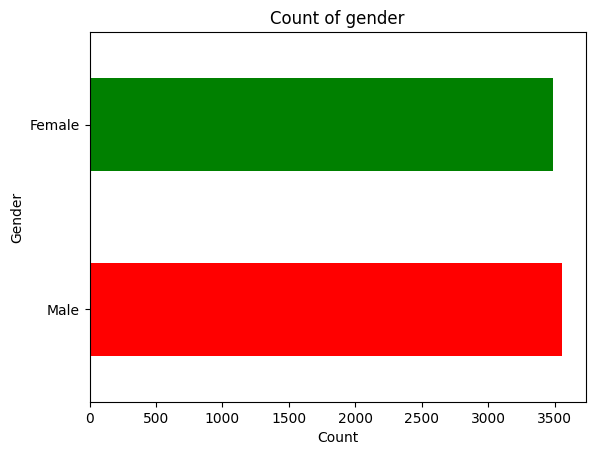

<Figure size 600x400 with 0 Axes>

In [27]:
# counts the number of occurrences of each gender in the 'gender' column of the 
gender_count = df_telco_cust['gender'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'green']

# This line creates the horizontal bar chart using the plot() function of the gender_count object
ax = gender_count.plot(kind='barh', color=colors)

# Adding label, title and size
plt.title('Count of gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.figure(figsize=(6,4))

plt.show()

#### Senior Citizens
This is to visualize the count of senior citizens and non-citizens customers in the dataset

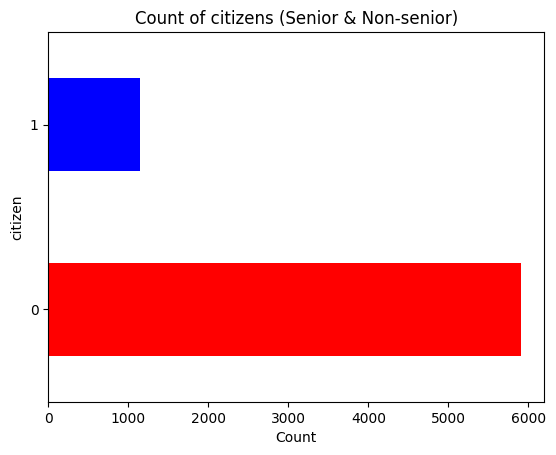

<Figure size 600x400 with 0 Axes>

In [28]:
citizen_count = df_telco_cust['SeniorCitizen'].value_counts()
colors = ['red', 'blue']
ax = citizen_count.plot(kind='barh', color=colors)
plt.title('Count of citizens (Senior & Non-senior)')
plt.xlabel('Count')
plt.ylabel('citizen')
plt.figure(figsize=(6,4))

plt.show()

#### Tenure
We will draw a histogram to visualize the distribution of the tenure variable

<Axes: xlabel='tenure', ylabel='Count'>

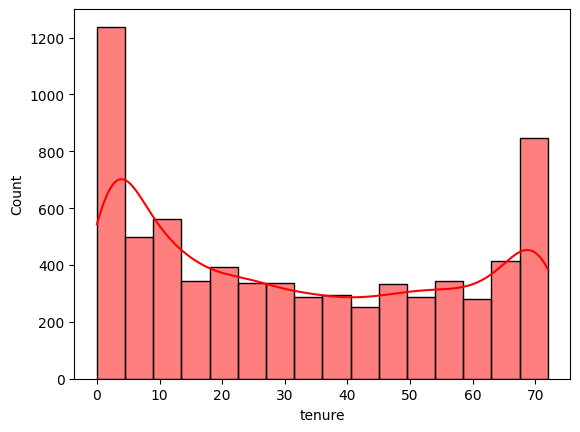

In [29]:
sns.histplot(df_telco_cust['tenure'], kde=True, color='red')

#### Streaming Movies
This is to visualize the count of customers with and without streaming TV

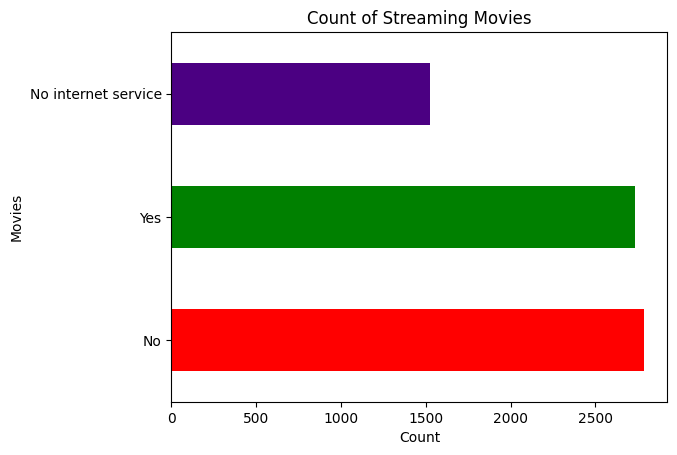

<Figure size 600x400 with 0 Axes>

In [30]:
S_movie_count = df_telco_cust['StreamingMovies'].value_counts()
colors = ['red', 'green', 'indigo']
ax = S_movie_count.plot(kind='barh', color=colors)
plt.title('Count of Streaming Movies')
plt.xlabel('Count')
plt.ylabel('Movies')
plt.figure(figsize=(6,4))

plt.show()

#### MultipleLines
A bar chart to visuale customers with and without multiple lines

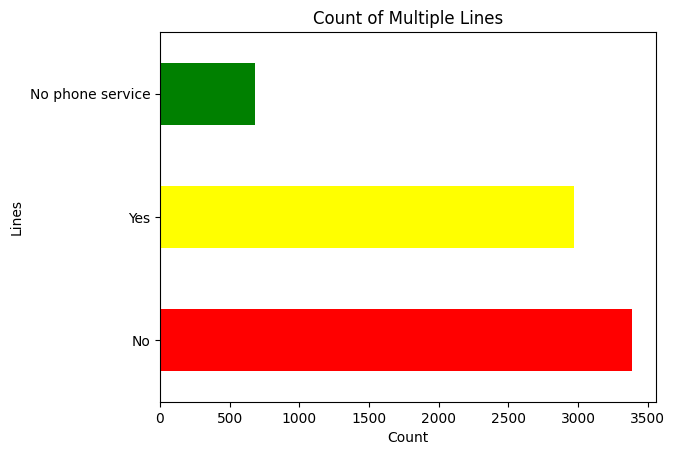

<Figure size 600x400 with 0 Axes>

In [31]:
Multi_count = df_telco_cust['MultipleLines'].value_counts()
colors = ['red', 'yellow', 'green']
ax = Multi_count.plot(kind='barh', color=colors)
plt.title('Count of Multiple Lines')
plt.xlabel('Count')
plt.ylabel('Lines')
plt.figure(figsize=(6,4))

plt.show()

#### Online Security
We created a bar chart to visual the count of customers with and without online security

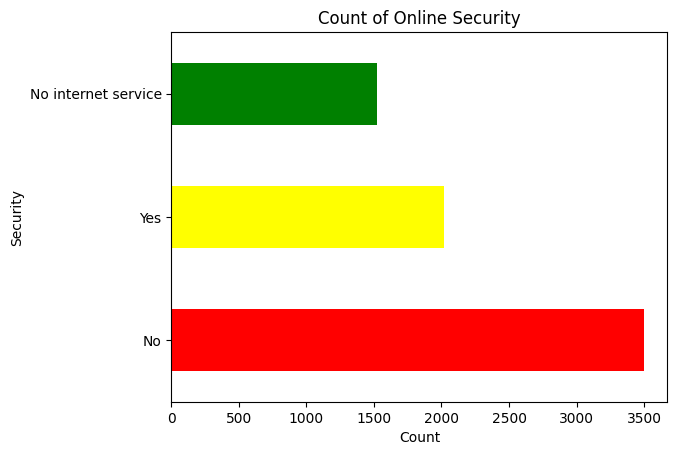

<Figure size 600x400 with 0 Axes>

In [32]:
Security_count = df_telco_cust['OnlineSecurity'].value_counts()
colors = ['red', 'yellow', 'green']
ax = Security_count.plot(kind='barh', color=colors)
plt.title('Count of Online Security')
plt.xlabel('Count')
plt.ylabel('Security')
plt.figure(figsize=(6,4))

plt.show()

#### Partner
We created a bar chart to visualize the count of customers with or without partners

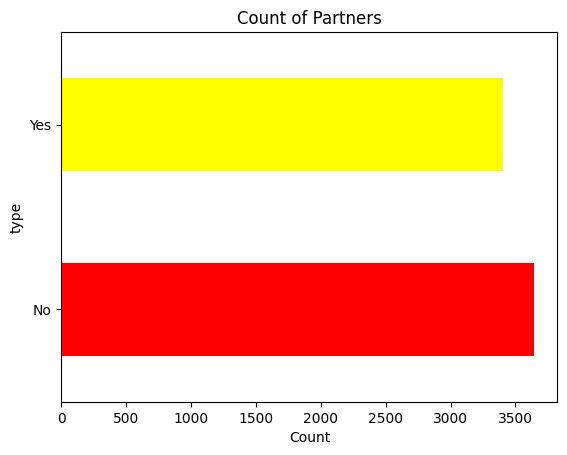

<Figure size 600x400 with 0 Axes>

In [33]:
partner_count = df_telco_cust['Partner'].value_counts()
colors = ['red', 'yellow', 'green']
ax = partner_count.plot(kind='barh', color=colors)
plt.title('Count of Partners')
plt.xlabel('Count')
plt.ylabel('type')
plt.figure(figsize=(6,4))

plt.show()

### Bivariate Analysis
We are going to look at the realtionship between target varial (Churn) and other variable in the dataset


#### Gender vs Churn

In [34]:
# 1. Create a pivot table of holiday counts by type and locale
pivot_table = pd.pivot_table(df_telco_cust, values = ['Contract'], index=['gender'], columns=['Churn'], aggfunc='count')

# Print the pivot table
print(pivot_table)

       Contract     
Churn        No  Yes
gender              
Female     2549  939
Male       2625  930


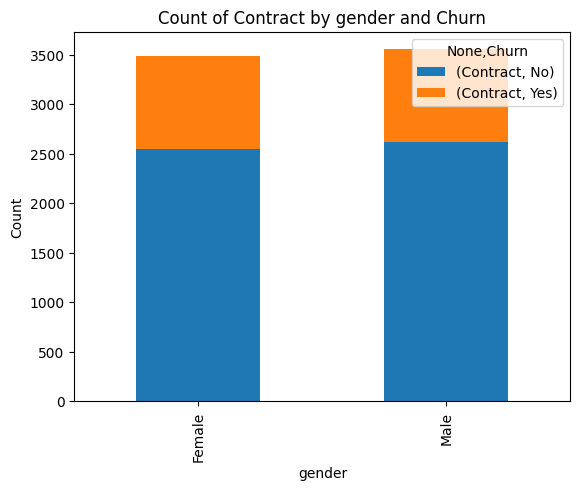

In [35]:
# Create a stacked bar chart of holiday counts by type and locale
pivot_table.plot(kind='bar', stacked=True)
plt.title('Count of Contract by gender and Churn')
plt.xlabel('gender')
plt.ylabel('Count')
# adjust x-axis labels rotation
plt.xticks(rotation=90)
plt.show()

#### SeniorCitizens vs Churn

<Axes: xlabel='SeniorCitizen', ylabel='Churn'>

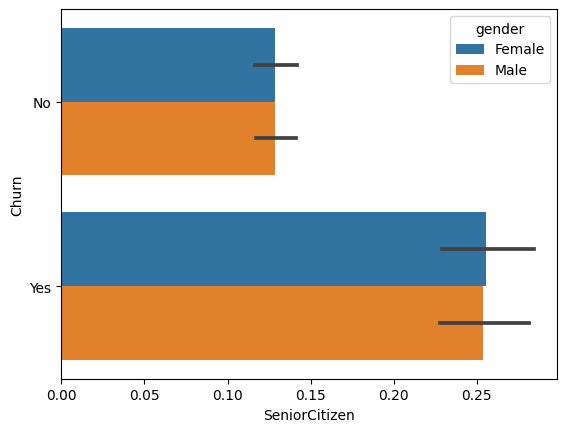

In [36]:
sns.barplot(data=df_telco_cust, x='SeniorCitizen', y='Churn', hue='gender')

#### Partner vs Churn

In [37]:
mapping = {'Yes': 1, 'No': 0}
df_telco_cust['Partner_num'] = df_telco_cust['Partner'].map(mapping)

<Axes: xlabel='Partner_num', ylabel='Churn'>

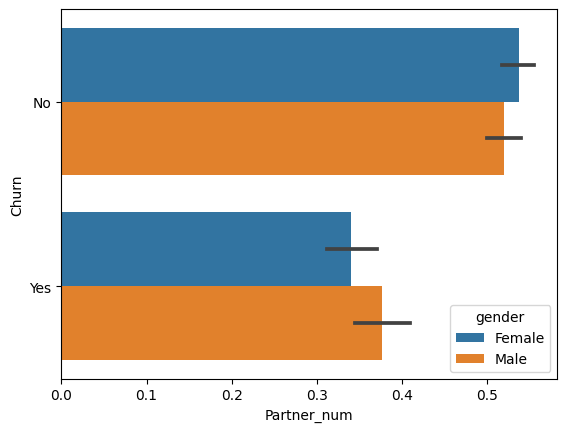

In [38]:
sns.barplot(data=df_telco_cust, x='Partner_num', y='Churn', hue='gender')

#### Dependent vs Churn

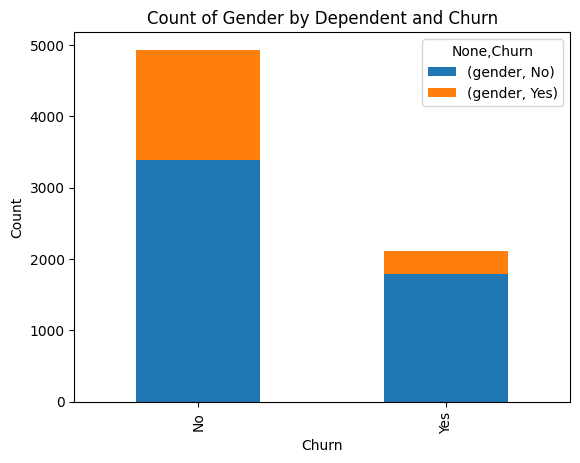

In [39]:
pivot_table = pd.pivot_table(df_telco_cust, values = ['gender'], index=['Dependents'], columns=['Churn'], aggfunc='count')


pivot_table.plot(kind='bar', stacked=True)
plt.title('Count of Gender by Dependent and Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
# adjust x-axis labels rotation
plt.xticks(rotation=90)
plt.show()

#### Tenure vs Churn

/tmp/ipykernel_22819/3550591061.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_telco_cust["tenure"], kde=True, bins=30)


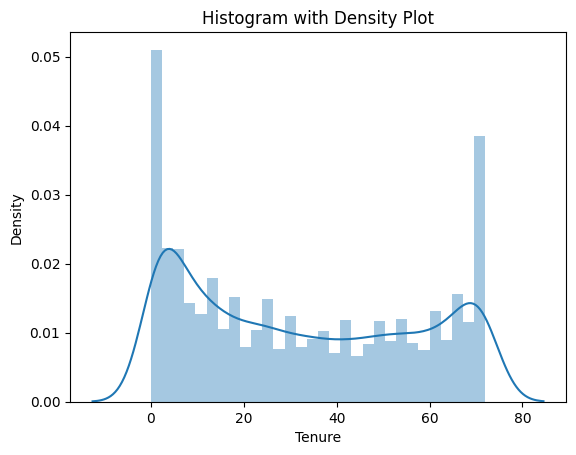

In [40]:
# create histogram with overlaid density plot using distplot() function
sns.distplot(df_telco_cust["tenure"], kde=True, bins=30)

# set x-axis and y-axis labels and plot title
plt.xlabel("Tenure")
plt.ylabel("Density")
plt.title("Histogram with Density Plot")

# display the plot
plt.show()


#### MonthlyCharges vs Churn

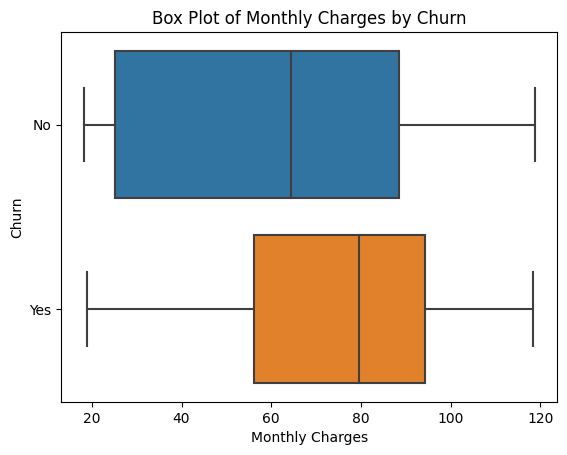

In [41]:
# create a box plot using boxplot() function
sns.boxplot(x="MonthlyCharges", y="Churn", data=df_telco_cust)

# set x-axis and y-axis labels and plot title
plt.xlabel("Monthly Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Monthly Charges by Churn")

# display the plot
plt.show()

#### TotalCharges vs Churn

In [42]:
# replace missing values in 'TotalCharges' column with 0.0
df_telco_cust['TotalCharges'] = df_telco_cust['TotalCharges'].replace(' ', '0.0')

# convert 'TotalCharges' column to a float data type
df_telco_cust['TotalCharges'] = df_telco_cust['TotalCharges'].astype(float)

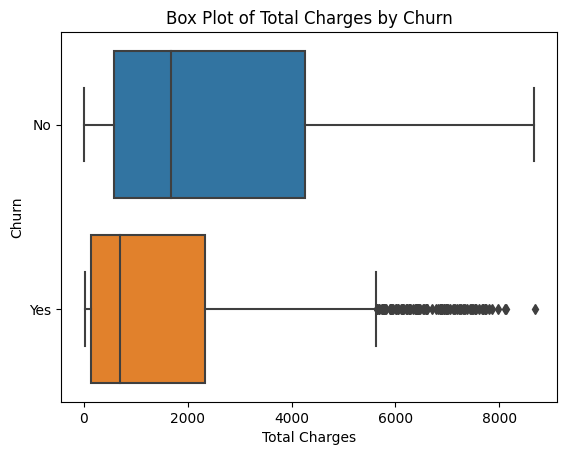

In [43]:
# create a box plot using boxplot() function
sns.boxplot(x="TotalCharges", y="Churn", data=df_telco_cust)

# set x-axis and y-axis labels and plot title
plt.xlabel("Total Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Total Charges by Churn")

# display the plot
plt.show()

#### InternetService vs Churn

In [44]:
df_telco_cust['Churn_num'] = df_telco_cust['Churn'].map(mapping)

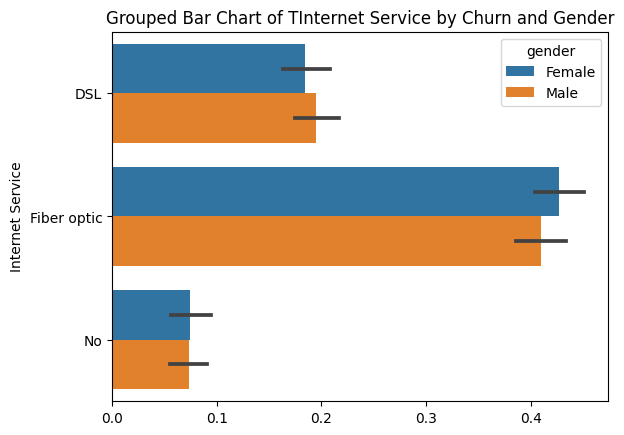

In [45]:
# create a grouped bar chart using barplot() function
sns.barplot(x="Churn_num", y="InternetService", hue="gender", data=df_telco_cust)

# set x-axis and y-axis labels and plot title
plt.xlabel("")
plt.ylabel("Internet Service")
plt.title("Grouped Bar Chart of TInternet Service by Churn and Gender")

# display the plot
plt.show()

#### PaymentMethod vs Churn

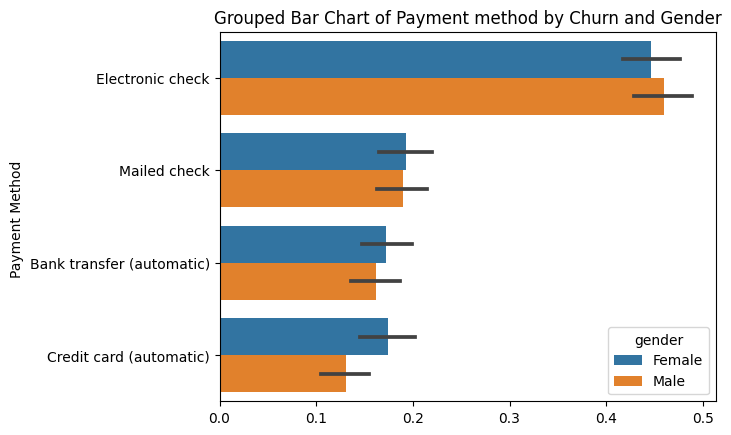

In [46]:
# create a grouped bar chart using barplot() function
sns.barplot(x="Churn_num", y="PaymentMethod", hue="gender", data=df_telco_cust)

# set x-axis and y-axis labels and plot title
plt.xlabel("")
plt.ylabel("Payment Method ")
plt.title("Grouped Bar Chart of Payment method by Churn and Gender")

# display the plot
plt.show()